In [1]:
from tensorflow.keras.utils import to_categorical
import pandas as pd
from pandas import read_excel
import numpy as np
import re
from re import sub
import multiprocessing
from unidecode import unidecode
import os
from time import time 
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout,Activation,Embedding,Flatten,Bidirectional,MaxPooling2D, Conv1D, MaxPooling1D
from keras.optimizers import SGD,Adam
from keras import regularizers
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import h5py
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.model_selection import StratifiedKFold

In [3]:
def text_to_word_list(text):
    text = text.split()
    return text

def replace_strings(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\u00C0-\u017F"          #latin
                           u"\u2000-\u206F"          #generalPunctuations
                               
                           "]+", flags=re.UNICODE)
    english_pattern=re.compile('[a-zA-Z0-9]+', flags=re.I)
    #latin_pattern=re.compile('[A-Za-z\u00C0-\u00D6\u00D8-\u00f6\u00f8-\u00ff\s]*',)
    
    text=emoji_pattern.sub(r'', text)
    text=english_pattern.sub(r'', text)

    return text

def remove_punctuations(my_str):
    # define punctuation
    punctuations = '''````£|¢|Ñ+-*/=EROero৳০১২৩৪৫৬৭৮৯012–34567•89।!()-[]{};:'"“\’,<>./?@#$%^&*_~‘—॥”‰⚽️✌�￰৷￰'''
    
    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char

    # display the unpunctuated string
    return no_punct



def joining(text):
    out=' '.join(text)
    return out

def preprocessing(text):
    out=remove_punctuations(replace_strings(text))
    return out

In [4]:
train_url = '/kaggle/input/dataset/train_corr.csv'
test_url = '/kaggle/input/dataset/test_corr.csv'
df_train = pd.read_csv(train_url)
df_test = pd.read_csv(test_url)
stop_words_df = pd.read_excel('/kaggle/input/bangla-stopwords/stopwords_bangla.xlsx',index_col=False)
STOPWORDS = set([word.strip() for word in stop_words_df['words']])

In [5]:
df_train['Comment'] = df_train.Comment.apply(lambda x: preprocessing(str(x)))
df_test['Comment'] = df_test.Comment.apply(lambda x:preprocessing(str(x)))

In [6]:
train1, test1 = df_train,df_test
training_sentences = []
testing_sentences = []



train_sentences=df_train['Comment'].values
train_labels=df_train['Error'].values
for i in range(train_sentences.shape[0]): 
    #print(train_sentences[i])
    x=str(train_sentences[i])
    training_sentences.append(x)
    
training_sentences=np.array(training_sentences)





test_sentences=df_test['Comment'].values
test_labels=df_test['Error'].values

for i in range(test_sentences.shape[0]): 
    x=str(test_sentences[i])
    testing_sentences.append(x)
    
testing_sentences=np.array(testing_sentences)


train_labels=keras.utils.to_categorical(train_labels)


test_labels=keras.utils.to_categorical(test_labels)
print("Training Set Length: "+str(len(train1)))
print("Testing Set Length: "+str(len(test1)))
print("training_sentences shape: "+str(training_sentences.shape))
print("testing_sentences shape: "+str(testing_sentences.shape))
print("train_labels shape: "+str(train_labels.shape))
print("test_labels shape: "+str(test_labels.shape))


Training Set Length: 20083
Testing Set Length: 5022
training_sentences shape: (20083,)
testing_sentences shape: (5022,)
train_labels shape: (20083, 2)
test_labels shape: (5022, 2)


In [8]:
vocab_size = 25000
embedding_dim = 300
max_length = 100
trunc_type='post'
oov_tok = "<OOV>"

In [9]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
print(len(word_index))
print("Word index length:"+str(len(tokenizer.word_index)))
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)


test_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(test_sequences,maxlen=max_length)

28623
Word index length:28623


In [14]:
print("Sentence :--> \n")
print(training_sentences[2]+"\n")
print("Sentence Tokenized and Converted into Sequence :--> \n")
print(str(sequences[2])+"\n")
print("After Padding the Sequence with padding length 100 :--> \n")
print(padded[2])

Sentence :--> 

যুগ যুগ ধরে আমাদের  মনে গেথে থাকবে এ গান

Sentence Tokenized and Converted into Sequence :--> 

[695, 695, 167, 16, 33, 3218, 203, 84, 28]

After Padding the Sequence with padding length 100 :--> 

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0  695  695  167   16   33 3218  203
   84   28]


In [15]:
print("Padded shape(training): "+str(padded.shape))
print("Padded shape(testing): "+str(testing_padded.shape))

Padded shape(training): (8032, 100)
Padded shape(testing): (2010, 100)


In [15]:
with tf.device('/gpu:0'):
    model= Sequential()
    model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
    model.add(Conv1D(200, kernel_size=3, activation = "relu"))
    model.add(Bidirectional(LSTM(64, return_sequences=True)))
    model.add(Dropout(0.5))
    model.add(Bidirectional(LSTM(64)))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Flatten())
    #l2 regularizer
    model.add(Dense(100,kernel_regularizer=regularizers.l2(0.01),activation="relu"))
    model.add(Dense(2, activation='softmax'))
    #sgd= SGD(lr=0.0001,decay=1e-6,momentum=0.9,nesterov=True)
    adam=Adam(learning_rate=0.01,beta_1=0.9,beta_2=0.999,epsilon=1e-07,amsgrad=False)
    model.summary()
    model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 300)          7500000   
                                                                 
 conv1d_1 (Conv1D)           (None, 98, 200)           180200    
                                                                 
 bidirectional_2 (Bidirecti  (None, 98, 128)           135680    
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 98, 128)           0         
                                                                 
 bidirectional_3 (Bidirecti  (None, 128)               98816     
 onal)                                                           
                                                                 
 dense_4 (Dense)             (None, 50)               

In [16]:
    history=model.fit(padded,train_labels,epochs=10,batch_size=100,validation_data=(testing_padded,test_labels),use_multiprocessing=True, workers=8)

Epoch 1/10
201/201 [==============================] - 139s 644ms/step - loss: 0.6096 - accuracy: 0.6858 - val_loss: 0.7935 - val_accuracy: 0.7115
Epoch 2/10
201/201 [==============================] - 124s 619ms/step - loss: 0.3810 - accuracy: 0.8366 - val_loss: 0.9895 - val_accuracy: 0.7164
Epoch 3/10
201/201 [==============================] - 124s 619ms/step - loss: 0.2766 - accuracy: 0.8933 - val_loss: 1.0342 - val_accuracy: 0.7172
Epoch 4/10
201/201 [==============================] - 124s 617ms/step - loss: 0.2376 - accuracy: 0.9110 - val_loss: 0.8305 - val_accuracy: 0.7280
Epoch 5/10
201/201 [==============================] - 123s 613ms/step - loss: 0.2157 - accuracy: 0.9215 - val_loss: 1.2077 - val_accuracy: 0.7232
Epoch 6/10
201/201 [==============================] - 123s 611ms/step - loss: 0.2078 - accuracy: 0.9238 - val_loss: 0.9539 - val_accuracy: 0.7294
Epoch 7/10
201/201 [==============================] - 123s 611ms/step - loss: 0.2004 - accuracy: 0.9273 - val_loss: 1.0855 -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


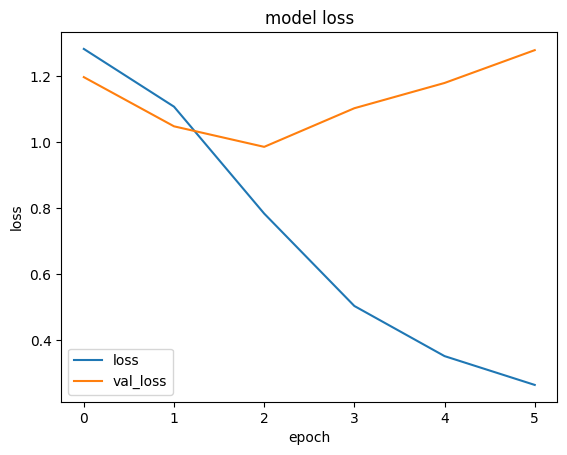

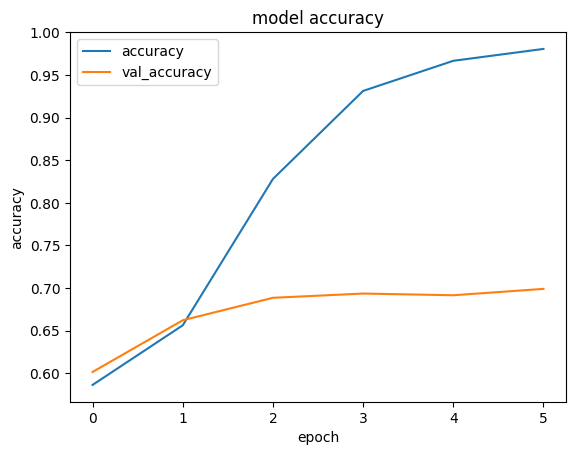

In [18]:
print(history.history.keys())
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'])
plt.show()

accuracy = history.history['accuracy']
val_accuracy= history.history['val_accuracy']
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

In [17]:
#accuracy calculation
loss_and_metrics = model.evaluate(padded,train_labels,batch_size=256)
print("The train accuracy is: "+str(loss_and_metrics[1]))
loss_and_metrics = model.evaluate(testing_padded,test_labels,batch_size=256)
print("The test accuracy is: "+str(loss_and_metrics[1]))

79/79 [==============================] - 26s 335ms/step - loss: 0.1993 - accuracy: 0.9297
The train accuracy is: 0.9297415614128113
20/20 [==============================] - 7s 328ms/step - loss: 1.3056 - accuracy: 0.7252
The test accuracy is: 0.7252090573310852


In [18]:
pred = (model.predict(testing_padded) > 0.5).astype("int32")

157/157 [==============================] - 12s 67ms/step


In [21]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, pred, target_names = ['Correct','Incorrect']))

              precision    recall  f1-score   support

     Correct       0.73      0.44      0.55      1910
   Incorrect       0.72      0.90      0.80      3112

   micro avg       0.73      0.73      0.73      5022
   macro avg       0.73      0.67      0.68      5022
weighted avg       0.73      0.73      0.71      5022
 samples avg       0.73      0.73      0.73      5022



In [14]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, pred, target_names = ['Correct','Incorrect']))

              precision    recall  f1-score   support

     Correct       0.76      0.42      0.54      1910
   Incorrect       0.72      0.92      0.81      3112

   micro avg       0.73      0.73      0.73      5022
   macro avg       0.74      0.67      0.67      5022
weighted avg       0.74      0.73      0.71      5022
 samples avg       0.73      0.73      0.73      5022

